# Task # 4 -
To Explore Decision Tree
Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly

In [1]:
import os
os.chdir("C:\\Users\\Ramya\\Desktop\\DataScienceTrack2020\\Grip")

In [2]:
import pandas as pd
df=pd.read_csv("Iris.tree.csv")
print(df.shape)

(150, 6)


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Model

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
df.drop("Id",axis=1,inplace=True)

In [6]:
X=df.drop("Species",axis=1)
y=df['Species']

In [7]:
import sklearn.model_selection as model_selection

In [9]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [10]:
model=model_selection.GridSearchCV(clf, param_grid={'max_depth':[2,3,4],'criterion':['gini','entropy']},cv=3)
model.fit(X,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4]})

In [11]:
model.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [12]:
model.best_score_

0.9733333333333333

In [13]:
clf=tree.DecisionTreeClassifier(max_depth=4,random_state=200)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=200)

In [14]:
clf.score(X,y)

0.9933333333333333

In [17]:
import os
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=X.columns,class_names=["0","1","2"],filled=True,rounded=True,proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)

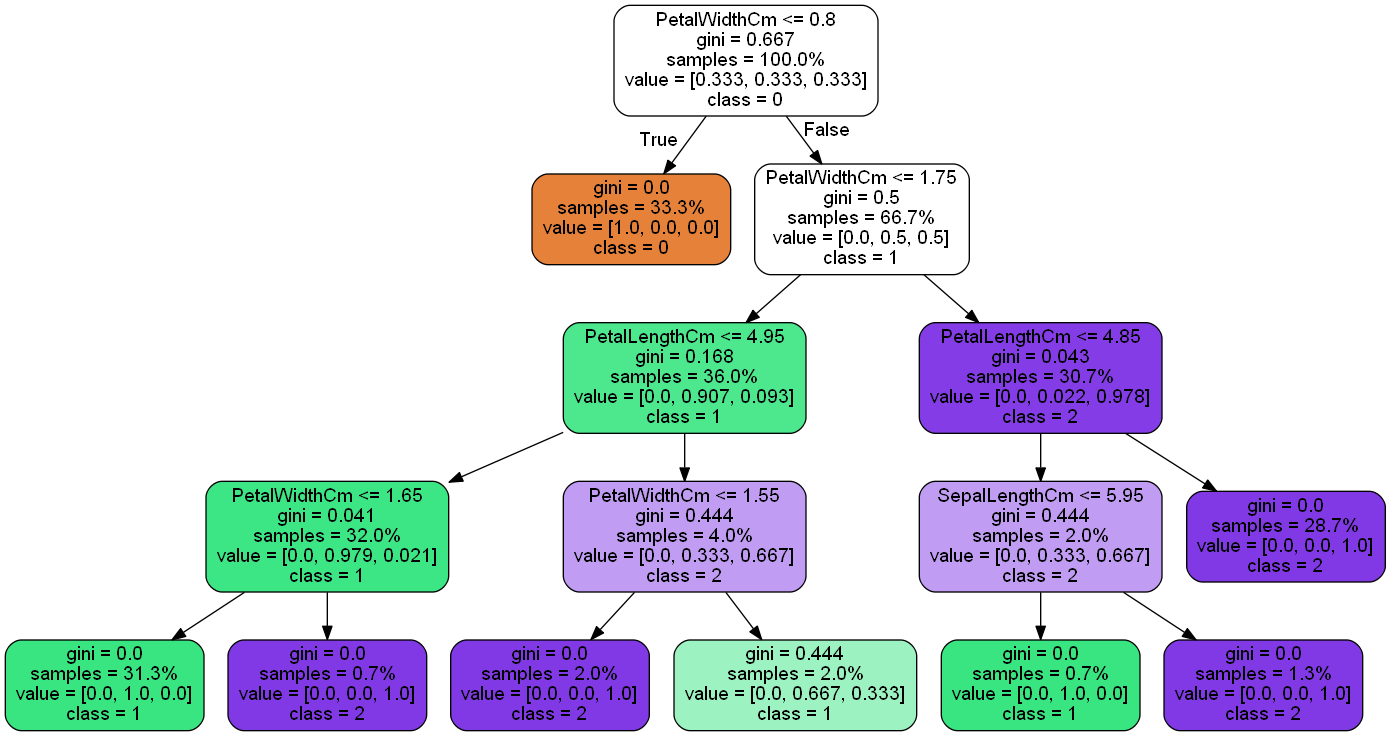

In [18]:
from IPython.display import Image
Image(graph.create_png())